## Hoja de trabajo 7.2 NN ##
**José Hurtarte 19707**  
**Andrei Portales 19825**  
**Christian Pérez 19710**  

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [4]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)


In [5]:
data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:

data['SalePrice'].mean()

180921.19589041095

### Filtrado de variables cara, mediana y económica

In [7]:
low_price_limit = data.SalePrice.quantile(0.33)
mid_price_limit = data.SalePrice.quantile(0.67)

(low_price_limit, mid_price_limit)

(139000.0, 191000.0)

In [8]:
data['PriceRangeInt'] = 1
data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2
data['PriceRangeInt']

C:\Users\josej\AppData\Local\Temp\ipykernel_9544\716762574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
C:\Users\josej\AppData\Local\Temp\ipykernel_9544\716762574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2


0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: PriceRangeInt, Length: 1460, dtype: int64

In [9]:
predictors_1 =['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
data[predictors_1]

,GrLivArea,GarageCars,TotalBsmtSF,OverallQual
0,1710,2,856,7
1,1262,2,1262,6
2,1786,2,920,7
3,1717,3,756,7
4,2198,3,1145,8
...,...,...,...,...
1455,1647,2,953,6
1456,2073,2,1542,6
1457,2340,1,1152,7
1458,1078,1,1078,5


<AxesSubplot:>

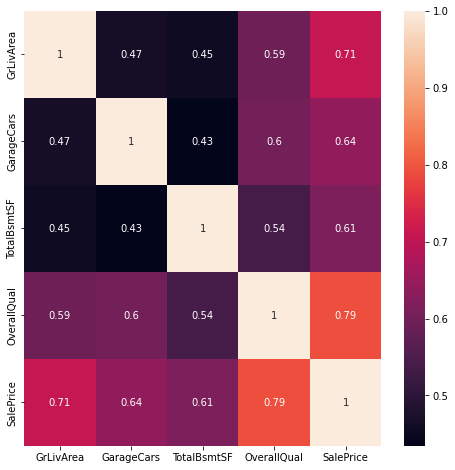

In [10]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_1 + ['SalePrice']].corr(), xticklabels=data[predictors_1 + ['SalePrice']].corr().columns, yticklabels=data[predictors_1 + ['SalePrice']].corr().columns, annot=True)


Para las variables a incluír en esta hoja de trabajo también se escogieron todas aquellas que tuviesen una correlación con coeficiente de Pearson alta y que tuviesen una correlación no fuerte entre ellas para evitar el overfit. Además el criterio es similar al de hojas de trabajo anteriores para poder tener una comparativa más exacta entre modelos de predicción

## Modelos de predicción categórica

In [11]:
# Data con variables para no modificar dataset original
data_vars = data[predictors_1  + ['PriceRangeInt']]
data_vars = data_vars.dropna()

y = data_vars['PriceRangeInt']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos

In [12]:
# Data con variables para no modificar dataset original
data_vars = data[predictors_1  + ['PriceRangeInt']]
data_vars = data_vars.dropna()

y = data_vars['PriceRangeInt']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

#### Normalización de los datos

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelo 1 con Topología de 2 capas con 90 y 30 neuronas y función de activación de Unidades lineales rectificadas 

In [14]:
modelo_mlp1 = MLPClassifier(hidden_layer_sizes=(90,30), max_iter=200, random_state=123, activation='relu', verbose=True)
modelo_mlp1.fit(X_train, y_train)
y_pred = modelo_mlp1.predict(X_test)
y_pred

Iteration 1, loss = 1.11793315
Iteration 2, loss = 1.02499585
Iteration 3, loss = 0.94906135
Iteration 4, loss = 0.88482152
Iteration 5, loss = 0.82937068
Iteration 6, loss = 0.77955118
Iteration 7, loss = 0.73712272
Iteration 8, loss = 0.70014688
Iteration 9, loss = 0.66833078
Iteration 10, loss = 0.64037249
Iteration 11, loss = 0.61605711
Iteration 12, loss = 0.59452160
Iteration 13, loss = 0.57587118
Iteration 14, loss = 0.55955508
Iteration 15, loss = 0.54551871
Iteration 16, loss = 0.53498809
Iteration 17, loss = 0.52281841
Iteration 18, loss = 0.51516508
Iteration 19, loss = 0.50872370
Iteration 20, loss = 0.50242401
Iteration 21, loss = 0.49684017
Iteration 22, loss = 0.49402936
Iteration 23, loss = 0.49122533
Iteration 24, loss = 0.48588512
Iteration 25, loss = 0.48320206
Iteration 26, loss = 0.48185314
Iteration 27, loss = 0.47957412
Iteration 28, loss = 0.47639324
Iteration 29, loss = 0.47378013
Iteration 30, loss = 0.47175651
Iteration 31, loss = 0.46918746
Iteration 32, los

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2,

In [15]:
y_pred = modelo_mlp1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para RNA de clasificación 1\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para RNA de clasificación 1
 [[106  24   3]
 [ 24 113  16]
 [  1  22 129]]
Accuracy:  0.7945205479452054


In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80       133
           1       0.71      0.74      0.72       153
           2       0.87      0.85      0.86       152

    accuracy                           0.79       438
   macro avg       0.80      0.79      0.80       438
weighted avg       0.80      0.79      0.80       438



Podemos observar que el primer modelo de redes neuronales de clasificación tiene una exctitud del 79.4%, además de una presición del 0.81 para casas económicas, 0.71 para casas medianas y 0.87 para casas caras. Siendo Un modelo que se desempeña de una excelente manera con las casas de precio caro, teniendo un recall score de 0.85, lo cual nos indica muy pocos falsos positivos. Además en el que más se equivocó fue en el de casas medianas, de igual manera el puntaje es bastante bueno, ya que tiene un recall score de 0.74 lo cual nos indica que 1/4 de las predicciones son falsos positivos, sin embargo es un score bastante bueno, por lo que podemos decir que este modelo de predicción es confiable.

### Modelo 2 con Topología de 2 capas con 24 y 56 neuronas y función de activación de Sigmoide logistico

In [18]:
modelo_mlp2 = MLPClassifier(hidden_layer_sizes=(24,56), max_iter=200, random_state=123, activation='logistic', verbose=True)
modelo_mlp2.fit(X_train, y_train)
y_pred = modelo_mlp2.predict(X_test)
y_pred

Iteration 1, loss = 1.17238092
Iteration 2, loss = 1.12492993
Iteration 3, loss = 1.10417415
Iteration 4, loss = 1.09890965
Iteration 5, loss = 1.09715105
Iteration 6, loss = 1.09349204
Iteration 7, loss = 1.08767144
Iteration 8, loss = 1.08408779
Iteration 9, loss = 1.08081929
Iteration 10, loss = 1.07659379
Iteration 11, loss = 1.07180250
Iteration 12, loss = 1.06651538
Iteration 13, loss = 1.06099809
Iteration 14, loss = 1.05509385
Iteration 15, loss = 1.04870807
Iteration 16, loss = 1.04007137
Iteration 17, loss = 1.03123109
Iteration 18, loss = 1.02181902
Iteration 19, loss = 1.01108046
Iteration 20, loss = 0.99947097
Iteration 21, loss = 0.98555530
Iteration 22, loss = 0.97081029
Iteration 23, loss = 0.95562022
Iteration 24, loss = 0.93911539
Iteration 25, loss = 0.91956560
Iteration 26, loss = 0.90115277
Iteration 27, loss = 0.88200742
Iteration 28, loss = 0.86218851
Iteration 29, loss = 0.84241503
Iteration 30, loss = 0.82411546
Iteration 31, loss = 0.80458384
Iteration 32, los

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2,

In [19]:
y_pred = modelo_mlp2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para RNA de clasificación 2\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para RNA de clasificación 2
 [[107  23   3]
 [ 33 105  15]
 [  0  24 128]]
Accuracy:  0.776255707762557


In [21]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78       133
           1       0.69      0.69      0.69       153
           2       0.88      0.84      0.86       152

    accuracy                           0.78       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.78      0.78      0.78       438



Con el segundo modelo de clasificación de redes neuronales, utilizamos un numero de capas menor al de neuronas por capa, lo cual es como se suele utilizar, este tomó ligeramente menos tiempo que el primer modelo realizado, además este modelo tiene una exactitud del 77.6% siendo inferior al primer modelo. También podemos destacar que tiene una presición con casas económicas del 0.76, casas medianas del 0.69 y casas caras del 0.88. Algo importante a mencionar es que este modelo tiene una presición mayor a la del primer modelo de redes neuronales clasificadoras, sin embargo tiene un recall score menor, lo cual nos indica que a pesar de tener una presición más alta, se equivoca más con falsos positivos. También se ve que este modelo es inferior en clasificar casas económicas y medianas, teniendo más problemas con las casas medianas, con un overall score del 0.69 nos dice que se suele equivocar con los falsos positivos casi en 1/3 de las veces.  

Por lo que podemos decir que el primer modelo con Topología de 90 capas con 30 neuronas y función de activación de Unidades lineales rectificadas es el mejor modelo de los 2 probados.

## Modelos de predicción de regresión

In [23]:
# Data con variables para no modificar dataset original
data_vars = data[predictors_1  + ['SalePrice']]
data_vars = data_vars.dropna()

y = data_vars['SalePrice']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos

In [24]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

#### Normalización de los datos

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelo 1 Regresión con Topología de 6 capas de las siguientes configuraciones de neuronas: (80,80,40,40,20,20) y función de activación de Unidades lineales rectificadas 

In [31]:
modelo_mlp1 = MLPRegressor(hidden_layer_sizes=(80,80,40,40,20,20), max_iter=200, random_state=123, activation='relu', verbose=True)
modelo_mlp1.fit(X_train, y_train)
y_pred = modelo_mlp1.predict(X_test)
y_pred

Iteration 1, loss = 19485822875.13890457
Iteration 2, loss = 19485794823.87845230
Iteration 3, loss = 19485748423.97848129
Iteration 4, loss = 19485667897.93441772
Iteration 5, loss = 19485514040.24689865
Iteration 6, loss = 19485191264.78403091
Iteration 7, loss = 19484546476.56634903
Iteration 8, loss = 19483250331.03521729
Iteration 9, loss = 19480630101.62861633
Iteration 10, loss = 19475793638.29169464
Iteration 11, loss = 19466760882.84986496
Iteration 12, loss = 19449619846.07653427
Iteration 13, loss = 19419303472.95811844
Iteration 14, loss = 19365209582.59107208
Iteration 15, loss = 19277541598.13640976
Iteration 16, loss = 19135102217.11180115
Iteration 17, loss = 18906374229.80128860
Iteration 18, loss = 18541207134.20013809
Iteration 19, loss = 18005929220.93194962
Iteration 20, loss = 17171508288.18159485
Iteration 21, loss = 16047864955.29296494
Iteration 22, loss = 14455059785.03266525
Iteration 23, loss = 12435935240.93623734
Iteration 24, loss = 9910510860.29430962
It

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([222160.2029485 , 165992.84003023, 209901.38307464, 229491.47386295,
       130129.46668322, 251248.59092656, 323816.20538471, 132467.57456213,
       140900.14815969, 127171.03594756, 140414.20724823, 250760.49025012,
       148628.69300034, 121318.68125018, 237643.26147119, 146570.92431151,
       141921.4373038 , 317153.41153763, 243007.32427768, 173328.91532111,
       157993.59919209, 204883.69661965, 118021.71958516, 193742.15738115,
       214634.7989094 , 139489.258771  , 184225.75424543, 177261.62211522,
       128579.92343352, 159609.61986464, 133997.33077456, 209541.15674707,
       130795.06804616, 231822.72432504, 335536.01448539, 214194.37362228,
       164488.10833949, 462210.60305433, 174607.75418536, 107948.73238504,
       128118.00637899, 248504.19313376, 181744.28028438, 168176.60712586,
       191591.26452538, 111782.84876605, 263889.78774344, 215645.5388412 ,
       287790.5565054 , 115523.9301102 , 173594.25915075, 173158.64655547,
       143033.93138583, 1

### Metricas de desempeño

#### Error medio absoluto

In [36]:
mean_absolute_error(y_test,y_pred)

22425.630497619128

#### Puntaje de Varianza

In [35]:
explained_variance_score(y_test,y_pred)

0.8208777485494905

Podemos observar un error medio absoluto de 22245.6, lo cual visualmente nos puede dar un indicador de que es una regresión bastante buena sabiendo que la variable respuesta de 180921.19 lo cual nos dice que nos puede llegar a dar una exactitud del 76% al momento de predecir datos de precio. Además podemos ver que el puntaje de varianza del 0.82 que tiende a ser 1, lo cual nos dice que estos valores tienen buenos cuadrados de las desviaciones estándar de los errores, dandonos poca variabilidad, siendo este un modelo confiable.

### Modelo 2 Regresión con Topología de 6 capas de 80 neuronas y función de activación de Sigmoide logistico

In [38]:
modelo_mlp2 = MLPRegressor(hidden_layer_sizes=(80,80,80,80,80,80), max_iter=200, random_state=123, activation='logistic', verbose=True)
modelo_mlp2.fit(X_train, y_train)
y_pred = modelo_mlp2.predict(X_test)
y_pred

Iteration 1, loss = 19485787384.66531372
Iteration 2, loss = 19485660839.36869049
Iteration 3, loss = 19485529540.37650299
Iteration 4, loss = 19485397741.79271698
Iteration 5, loss = 19485272988.66125107
Iteration 6, loss = 19485166846.47725677
Iteration 7, loss = 19485078955.42636108
Iteration 8, loss = 19485005132.98802567
Iteration 9, loss = 19484939563.52938080
Iteration 10, loss = 19484877896.57344055
Iteration 11, loss = 19484818644.13067245
Iteration 12, loss = 19484761043.05971527
Iteration 13, loss = 19484704433.58766937
Iteration 14, loss = 19484647748.14528656
Iteration 15, loss = 19484590424.41189957
Iteration 16, loss = 19484531455.43470001
Iteration 17, loss = 19484469454.91888046
Iteration 18, loss = 19484406971.01523972
Iteration 19, loss = 19484343191.08018875
Iteration 20, loss = 19484279543.90848160
Iteration 21, loss = 19484216197.50855637
Iteration 22, loss = 19484153436.23289108
Iteration 23, loss = 19484092035.78755569
Iteration 24, loss = 19484031246.01897430
I

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([71.54624756, 71.54624755, 71.54624755, 71.54624757, 71.54624749,
       71.54624759, 71.54624761, 71.54624745, 71.54624751, 71.54624744,
       71.54624751, 71.54624757, 71.5462475 , 71.54624746, 71.54624757,
       71.54624751, 71.54624749, 71.54624762, 71.54624756, 71.54624753,
       71.54624752, 71.54624754, 71.54624745, 71.54624753, 71.54624755,
       71.54624751, 71.54624755, 71.54624753, 71.54624749, 71.54624752,
       71.54624749, 71.54624756, 71.54624748, 71.54624757, 71.54624762,
       71.54624756, 71.54624753, 71.54624765, 71.54624754, 71.54624745,
       71.54624749, 71.54624758, 71.54624754, 71.54624753, 71.54624756,
       71.54624745, 71.5462476 , 71.54624756, 71.54624759, 71.54624746,
       71.54624752, 71.54624754, 71.54624749, 71.54624754, 71.54624743,
       71.54624751, 71.54624746, 71.54624752, 71.54624759, 71.54624763,
       71.54624744, 71.54624762, 71.54624753, 71.54624755, 71.54624755,
       71.54624749, 71.54624748, 71.54624759, 71.54624757, 71.54

### Metricas de desempeño

#### Error medio absoluto

In [39]:
mean_absolute_error(y_test,y_pred)

182981.46288489495

#### Puntaje de Varianza

In [40]:
explained_variance_score(y_test,y_pred)

1.241229341530925e-12

Podemos decir que a pesar de que el error medio absoluto de nuestros datos en el segundo modelo de regresión, este modelo tiene una alta variablilidad en los datos, ya que el puntaje de varianza llega a tender a 0, lo cual nos indica una alta desviación estandar, indicandonos un alto error en las predicciones, lo cual nos hace concluír que este modelo no es bueno para predecir datos.

Basado en lo anterior mencionado, el modelo que predice mejor los datos es el que posee Topología de 6 capas de las siguientes configuraciones de neuronas: (80,80,40,40,20,20)